<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/%EC%A4%91%EA%B8%89/17%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd

In [69]:
air = pd.read_csv('sample_data/AirPassengers.csv', parse_dates=[0])
#air = pd.read_csv('sample_data/AirPassengers.csv')

In [70]:
air

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [71]:
import statsmodels.api as sm

In [72]:
m = sm.tsa.ARIMA(air['#Passengers'])

In [73]:
x = m.fit()

In [74]:
x.forecast(3)

144    280.298605
145    280.298605
146    280.298605
Name: predicted_mean, dtype: float64

In [75]:
!pip install -U scalecast

In [76]:
from scalecast.Forecaster import Forecaster

In [77]:
f = Forecaster(air['#Passengers'],air['Month'], 12, 0.25, True)

In [78]:
f.estimators

['catboost',
 'elasticnet',
 'gbt',
 'knn',
 'lasso',
 'lightgbm',
 'mlp',
 'mlr',
 'rf',
 'ridge',
 'sgd',
 'svr',
 'xgboost',
 'arima',
 'hwes',
 'prophet',
 'silverkite',
 'rnn',
 'lstm',
 'naive',
 'tbats',
 'theta',
 'combo']

In [79]:
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=12
    Xvars=[]
    TestLength=36
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    CurrentEstimator=mlr
    GridsFile=Grids
)

In [80]:
f.set_estimator('arima')  ##기법만 정해줌

In [81]:
#f.manual_forecast('arima test', order=(1,1,1), seasonal_order=(2,1,1,12))
f.manual_forecast('arima test')

In [82]:
f.set_estimator('prophet')

In [83]:
f.manual_forecast('prophet test')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpallywq8x/3scp3lzi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpallywq8x/akydmmpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71555', 'data', 'file=/tmp/tmpallywq8x/3scp3lzi.json', 'init=/tmp/tmpallywq8x/akydmmpl.json', 'output', 'file=/tmp/tmpallywq8x/prophet_modelyacy8qe9/prophet_model-20230729084355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:43:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:43:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

<Axes: xlabel='Date', ylabel='Values'>

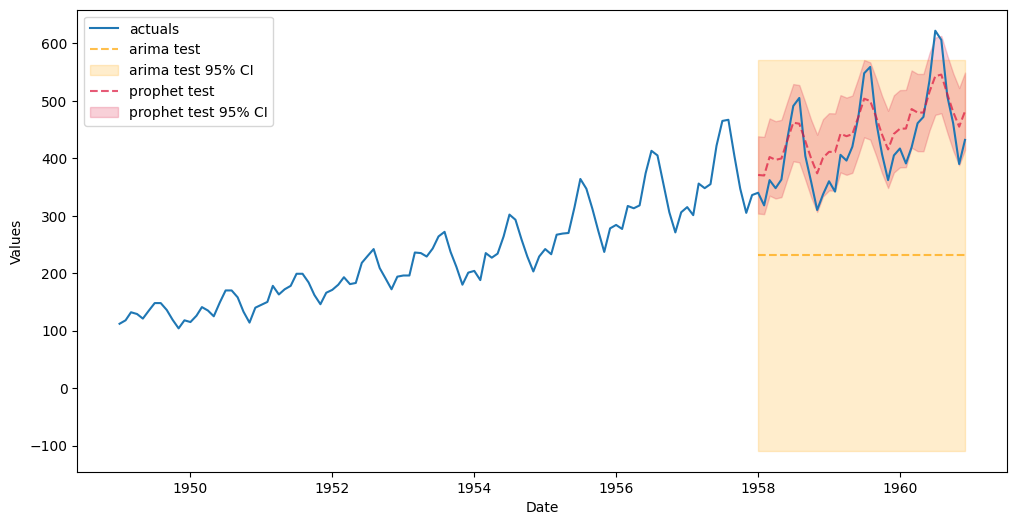

In [84]:
f.plot_test_set(ci=True)

# hyperparameter tuning

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
f.set_validation_length(12)

In [58]:
grid = {
    'order': [(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order': [(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

In [59]:
f.ingest_grid(grid)

In [60]:
f.tune()

In [61]:
f.auto_forecast('auto')

<Axes: xlabel='Date', ylabel='Values'>

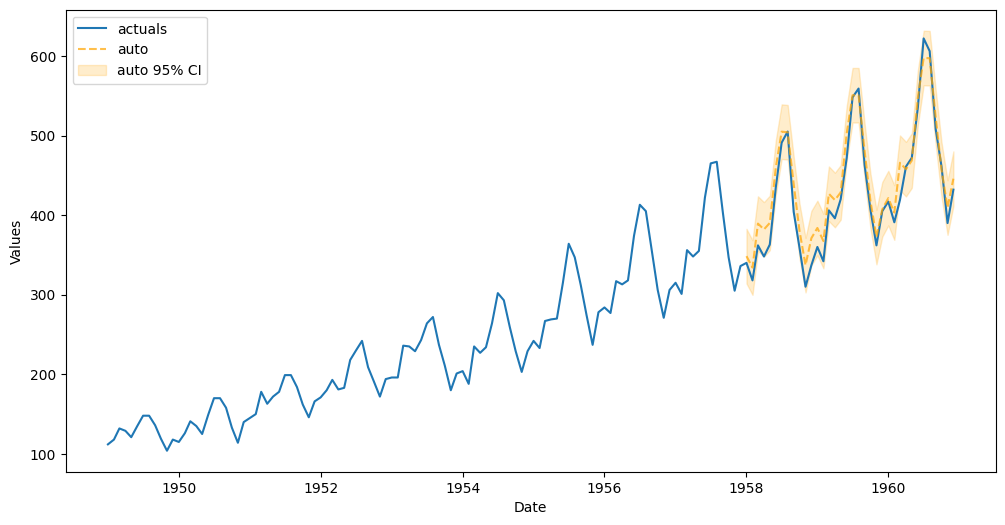

In [62]:
f.plot_test_set('auto', ci=True)

In [52]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  144
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.927
Date:                          Sat, 29 Jul 2023   AIC                           1015.854
Time:                                  08:18:42   BIC                           1033.105
Sample:                                       0   HQIC                          1022.864
                                          - 144                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0775      0.278     -0.279      0.781      -0.623       0.468
ma.L1         -0.3526      0.251     -1.402      0.161      -0.845       0.140
ar.S.L12       0.6662      0.152      4.374      0.000       0.368       0.965
ar.S.L24       0.3322      0.099      3.364      0.001       0.139       0.526
ma.S.L12      -0.9730      1.128     -0.863      0.388      -3.184       1.238
sigma2       110.5595    103.488      1.068      0.285     -92.273     313.392
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.88
Prob(Q):                              0.99   Prob(JB):                         0.02
Heteroskedasticity (H):               2.77   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
from scalecast.auxmodels import auto_arima

In [44]:
f.estimators

['catboost',
 'elasticnet',
 'gbt',
 'knn',
 'lasso',
 'lightgbm',
 'mlp',
 'mlr',
 'rf',
 'ridge',
 'sgd',
 'svr',
 'xgboost',
 'arima',
 'hwes',
 'prophet',
 'silverkite',
 'rnn',
 'lstm',
 'naive',
 'tbats',
 'theta',
 'combo']

In [45]:
auto_arima(f)

<Axes: xlabel='Date', ylabel='Values'>

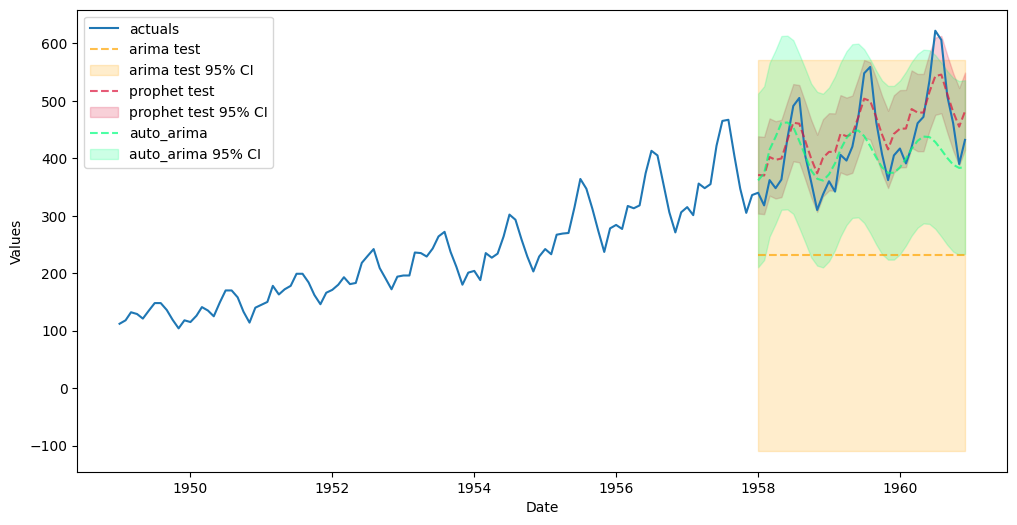

In [46]:
f.plot_test_set(ci=True)

<Axes: xlabel='Date', ylabel='Values'>

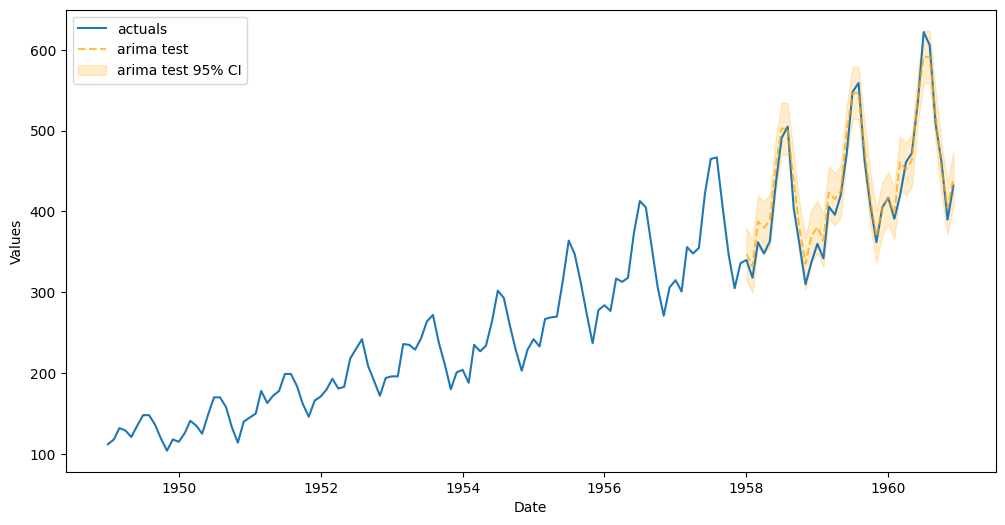

In [53]:
f.plot_test_set(ci=True, models='arima test')

<Axes: xlabel='Date', ylabel='Values'>

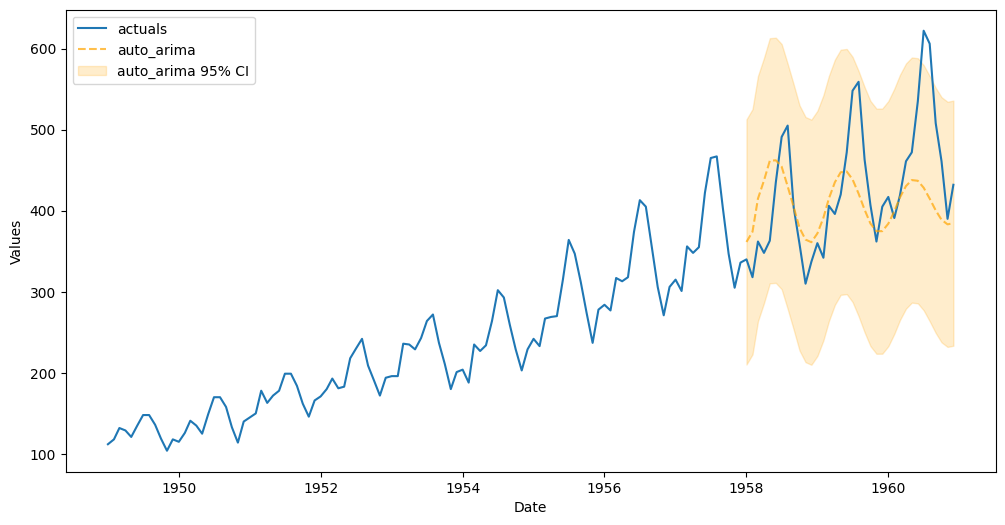

In [54]:
f.plot_test_set(ci=True, models='auto_arima')

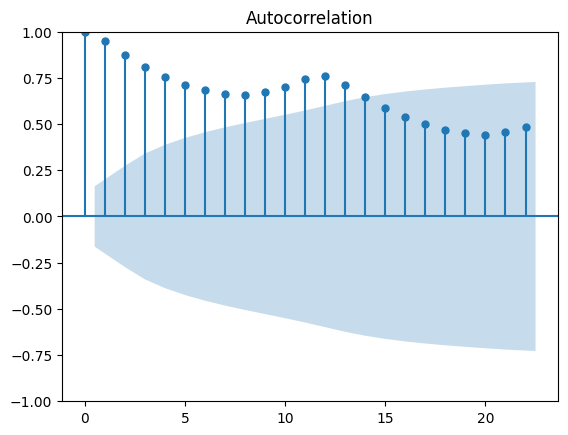

In [34]:
acf = f.plot_acf()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


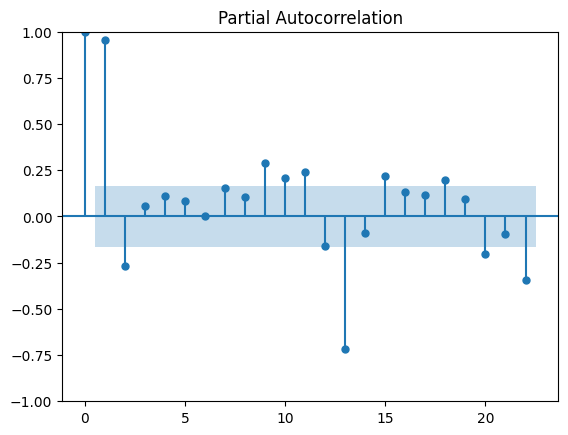

In [36]:
pacf = f.plot_pacf()

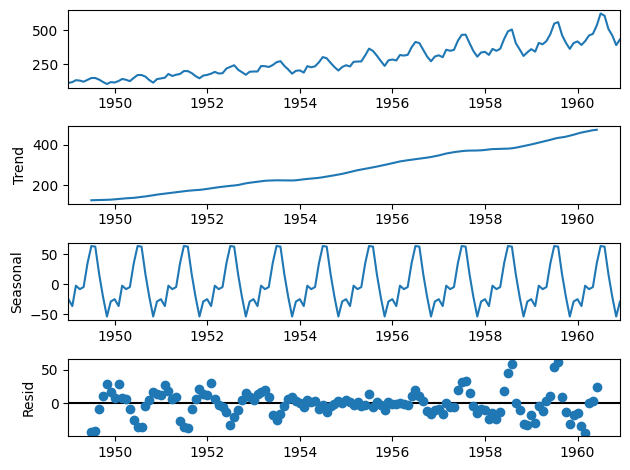

In [39]:
s = f.seasonal_decompose().plot()

In [40]:
f.adf_test()

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
f.manual_forecast('arima my')

# scikit-learn 가져온 이유 =>
# 시계열 데이터이지만 시간의 개념을 없앨 수 있음 (예측이 잘 안되면 왜 시간 의존성이 적어서) :scikit-learn 모델 사용
(시간 개념 없애서)
# trend 예측 할 때 regression 사용
# scikit-learn 방식 ( 모델 불러 인스턴스, 학습시키고 테스트) vs scikit-learn 모델 사용 (scaletest)
